### Zadania

Główna część listy (zadania 1-3) dotyczy detekcji krawędzi na obrazach. Zadanie 4 kontynuuje temat binaryzacji, skupiając się na operacjach globalnych (przekształceniach histogramu).

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.pylabtools import figsize
from PIL import Image

##### Zad. 1: Wyznaczenie gradientów

Wykonaj dla obrazu `coins` sztuczny obraz ilustrujący wielkość (moduł) wektora gradientu w danym punkcie. Do wyświetlenia użyj [mapy kolorów](https://matplotlib.org/stable/tutorials/colors/colormaps.html) `hot` do oznaczenia wielkości gradientu odpowiednim kolorem – im większa wartość, tym jaśniej (_mapa ciepła_).  
Gdzie gradienty są bliskie zera?  
Czy uzyskany wynik pozwoliłby np. na detekcję obiektów?

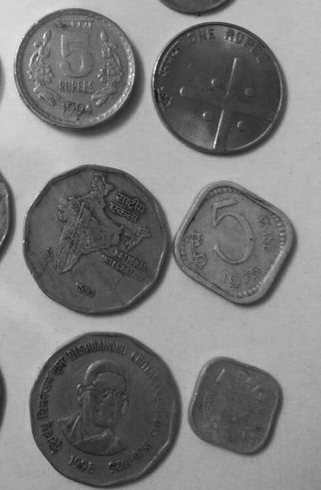

In [33]:
coins = cv2.imread('../data/Monety_szare.bmp', cv2.IMREAD_GRAYSCALE)
Image.fromarray(coins)

Rozwiązanie:

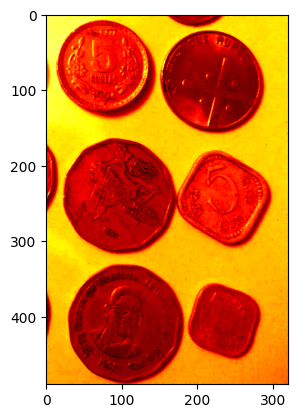

In [5]:
_ = plt.imshow(coins, cmap='hot') # przykład wyświetlania z mapą kolorów

In [32]:
sobelx = cv2.Sobel(coins,cv2.CV_64F, dx=1, dy=0, ksize=5)  # dx, dy - derivative orders
sobely = cv2.Sobel(coins,cv2.CV_64F, dx=0,dy=1,ksize=5)
gradient_magnitude = np.linalg.norm(np.array((sobelx, sobely)), axis=0)

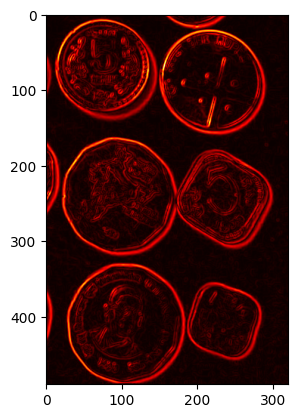

In [34]:
_ = plt.imshow(gradient_magnitude, cmap='hot')

---

##### Zad. 2: Detekcja krawędzi

Przeprowadź z obrazem `coins_noise` takie przekształcenia, aby zmaksymalizować możliwość rozpoznania obiektów. Wykorzystaj [filtr Canny'ego](https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#ga04723e007ed888ddf11d9ba04e2232de) do detekcji krawędzi; zbadaj jego zachowanie w zależności od wartości **progów** oraz sposobu redukcji **szumu**.

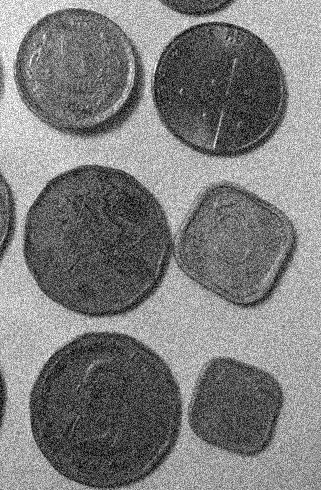

In [25]:
coins_noise = cv2.imread('../data/Monety_szare_szum.bmp', cv2.IMREAD_GRAYSCALE)
Image.fromarray(coins_noise)

Rozwiązanie:

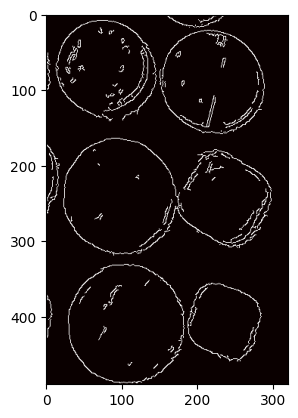

In [46]:
blurred = cv2.GaussianBlur(coins_noise, (5,5), 0)
_ = plt.imshow(cv2.Canny(blurred, 100, 200), cmap='hot')  # zbyt niska czułość?

---

##### Zad. 3: Wyrównanie histogramu

Wyrównaj histogram obrazu `coins_noise`. Wyniki zaprezentuj za pomocą obrazów i towarzyszących im histogramów. Powtórz eksperyment z detekcją krawędzi (zad 2) dla wyrównanego obrazu i omów różnice.

In [102]:
coins_histogram, bins = np.histogram(coins_noise, bins=256, density=True)
coins_cdf = (coins_histogram.cumsum() * bins.max())
coins_equalized = coins_cdf[coins_noise]

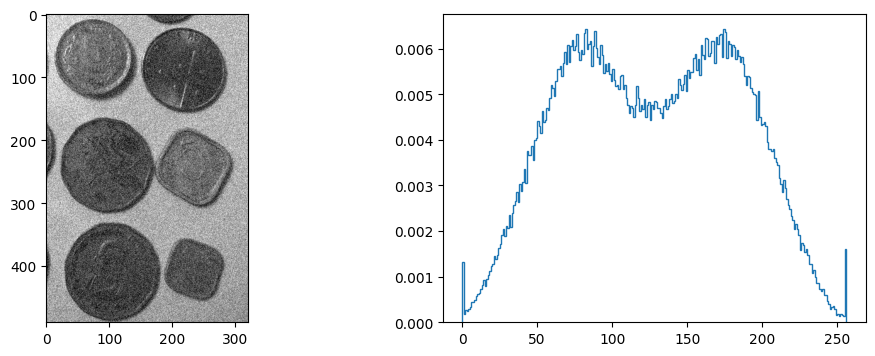

In [101]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
_ = ax1.imshow(coins_noise, cmap='gray')
_ = ax2.stairs(np.histogram(coins_noise, bins=256, density=True)[0])

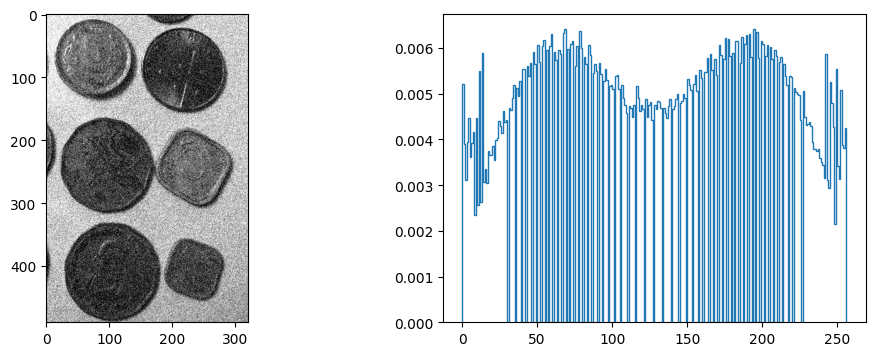

In [100]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
_ = ax1.imshow(coins_equalized, cmap='gray')
_ = ax2.stairs(np.histogram(coins_equalized, bins=256, density=True)[0])

---

##### Zad. 4: Transformacja do rozkładu docelowego

Dla obrazów `hare_gray` (od tego zacznij) i `hare_roi` wykonaj transformację do wybranego (założonego przez siebie) rozkładu docelowego, tak aby zmaksymalizować możliwość wyodrębnienia obiektu z otoczenia (zająca) przy użyciu algorytmu binaryzacji Otsu. Zbadaj wpływ kształtu rozkładu docelowego na zachowanie transformacji.  
Jaki(e) parametr(y) rozkładu są najistotniejsze?

Podpowiedź: przedstawiona we wstępie teoretycznym transformacja obu rozkładów (źródłowego i docelowego) do rozkładu jednostajnego _nie musi_ zostać faktycznie wykonana (dlatego nie używaj w zadaniu funkcji `cv2.equalizeHist`)! Wystarczy porównywanie ze sobą wartości ze skumulowanych rozkładów (rysunek 3).

Podpowiedź 2: [`cv2.LUT`](https://docs.opencv.org/4.5.3/d2/de8/group__core__array.html#gab55b8d062b7f5587720ede032d34156f)

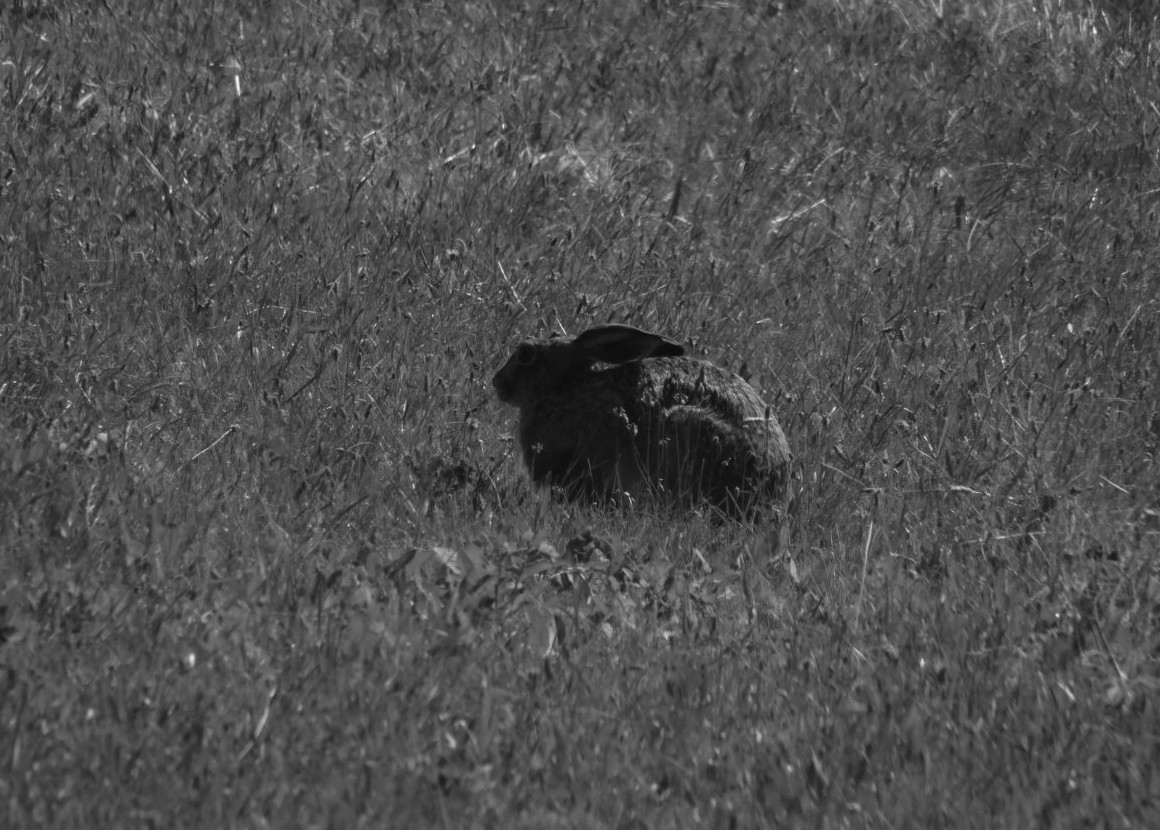

In [104]:
hare_gray = cv2.imread('../data/Zajac.jpg', cv2.IMREAD_GRAYSCALE)
Image.fromarray(hare_gray)

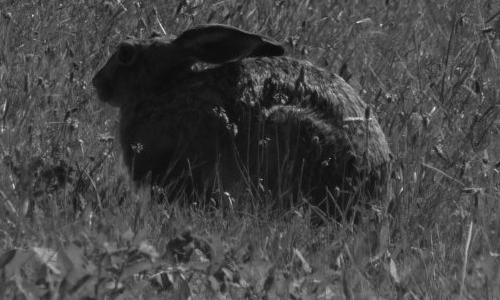

In [105]:
hare_roi = hare_gray[300:600, 400:900].copy()
Image.fromarray(hare_roi)

Rozwiązanie:

In [119]:
from scipy.stats import norm

In [183]:
def bimodal_cdf(m1, m2, mu1, mu2, w1=0.5, w2=0.5, n=10**5):  # TODO add random choice instead of weights
    hist, bin_edges = np.histogram(
            np.concatenate([norm.rvs(loc=m1, scale=mu1, size=int(n*w1)), norm.rvs(loc=m2, scale=mu2, size=int(n*w2))]),
            bins=256,
            density=True
        )
    bin_widths = np.diff(bin_edges)
    cdf = np.cumsum(hist * bin_widths)
    return cdf / cdf[-1]

In [189]:
def generate_matching_lookup_table(source_cdf, reference_cdf):
    inv_reference_cdf = np.interp(source_cdf, reference_cdf, np.arange(0, 256))
    return np.rint(inv_reference_cdf)

In [ ]:
def run_hare_experiment(hare, reference_distribution_parameters, ):
    return

In [227]:
hare_hist, bins = np.histogram(hare_gray, bins=256, density=True)
hare_cdf = np.cumsum(hare_hist)
hare_reference_cdf = bimodal_cdf(0.05, 0.75, mu1=0.01, mu2=0.01)
lookup_table = generate_matching_lookup_table(hare_cdf, hare_reference_cdf)

In [228]:
ret2,th2 = cv2.threshold(hare_gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

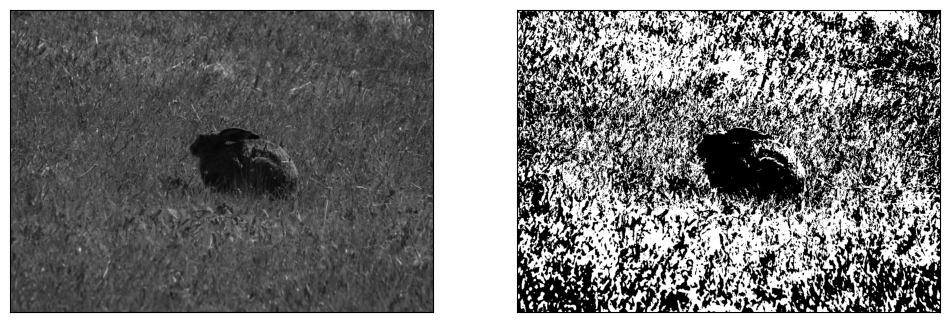

In [240]:
ret2,th2 = cv2.threshold(hare_gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
_ = ax1.imshow(hare_gray, cmap='gray')
_ = ax2.imshow(th2, cmap='gray')
_ = ax1.set_xticks([]); _ = ax1.set_yticks([]); _ = ax2.set_xticks([]); _ = ax2.set_yticks([])

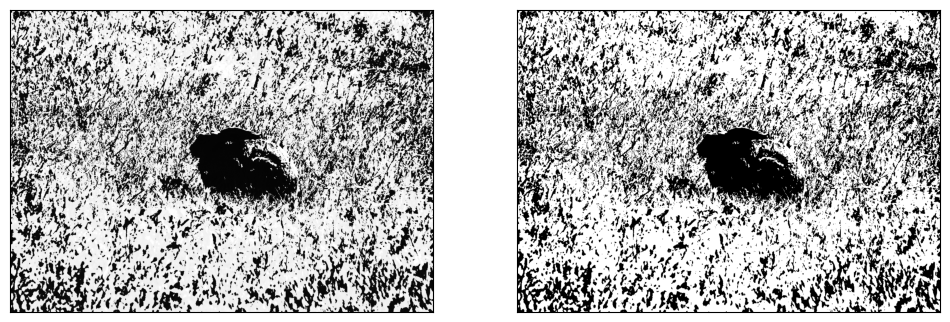

In [239]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
matched = np.rint(cv2.LUT(hare_gray, lookup_table))
ret2,th2 = cv2.threshold(matched.astype(np.uint8), 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
_ = ax1.imshow(matched, cmap='gray')
_ = ax2.imshow(th2, cmap='gray')
_ = ax1.set_xticks([]); _ = ax1.set_yticks([]); _ = ax2.set_xticks([]); _ = ax2.set_yticks([])

In [236]:
hare_gray

array([[70, 64, 65, ..., 97, 78, 52],
       [67, 62, 63, ..., 91, 72, 49],
       [62, 59, 60, ..., 83, 67, 53],
       ...,
       [66, 65, 65, ..., 70, 71, 71],
       [66, 66, 65, ..., 70, 70, 70],
       [66, 66, 66, ..., 70, 70, 69]], shape=(830, 1160), dtype=uint8)

In [238]:
matched.astype(np.uint8)

array([[ 17,  14,  14, ..., 244, 238,  10],
       [ 15,  13,  13, ..., 243,  19,  10],
       [ 13,  12,  12, ..., 240,  15,  11],
       ...,
       [ 14,  14,  14, ...,  17,  17,  17],
       [ 14,  14,  14, ...,  17,  17,  17],
       [ 14,  14,  14, ...,  17,  17,  16]],
      shape=(830, 1160), dtype=uint8)